In [115]:
import h5py
import deepdish as dd
from convergenets.utils import utils
from scripts.visualizations.helpers import load_weights
from tqdm import tqdm
from tqdm import trange

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import itertools
import deepdish as dd
from scipy.stats import norm as sp_norm
from sklearn.linear_model import LinearRegression


# Momentum resets

Trying to reproduce Stan's result


python train.py --experiment momentum_resets --expid rest18_timnet_constlr --save-dir gs://jv_neural_mechanics --dataset tiny-imagenet --data-dir /home/jvrsgsty/data --model resnet18 --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 256 --epochs 100 --save-freq 5000000 --train-batch-size 32 --lr 0.1 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-01 --overwrite -v

python train.py --experiment momentum_resets --expid rest18_timnet_droplr --save-dir gs://jv_neural_mechanics --dataset tiny-imagenet --data-dir /home/jvrsgsty/data --model resnet18 --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 256 --epochs 100 --save-freq 5000000 --train-batch-size 32 --lr 0.1 --lr-drops 30 60 80 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-02 --overwrite -v

### For these I editted the code by hand. Let's see if it works. 
python train.py --experiment momentum_resets --expid rest18_timnet_droplr_resets --save-dir gs://jv_neural_mechanics --dataset tiny-imagenet --data-dir /home/jvrsgsty/data --model resnet18 --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 256 --epochs 100 --save-freq 5000000 --train-batch-size 32 --lr 0.1  --lr-drops 30 60 80 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-03 --overwrite -v

python train.py --experiment momentum_resets --expid rest18_timnet_resets --save-dir gs://jv_neural_mechanics --dataset tiny-imagenet --data-dir /home/jvrsgsty/data --model resnet18 --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 256 --epochs 100 --save-freq 5000000 --train-batch-size 32 --lr 0.1 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-04 --overwrite -v


CUDA_VISIBLE_DEVICES=1 python cache.py --metrics performance_from_ckpt --experiment momentum_resets --expid rest18_cifar100_constlr --save-dir /mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics --overwrite

CUDA_VISIBLE_DEVICES=1 python cache.py --metrics performance_from_ckpt --experiment momentum_resets --expid rest18_cifar100_droplr --save-dir /mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics --overwrite

CUDA_VISIBLE_DEVICES=1 python cache.py --metrics performance_from_ckpt --experiment momentum_resets --expid rest18_cifar100_resets --save-dir /mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics --overwrite

CUDA_VISIBLE_DEVICES=1 python cache.py --metrics performance_from_ckpt --experiment momentum_resets --expid rest18_cifar100_droplr_resets --save-dir /mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics --overwrite


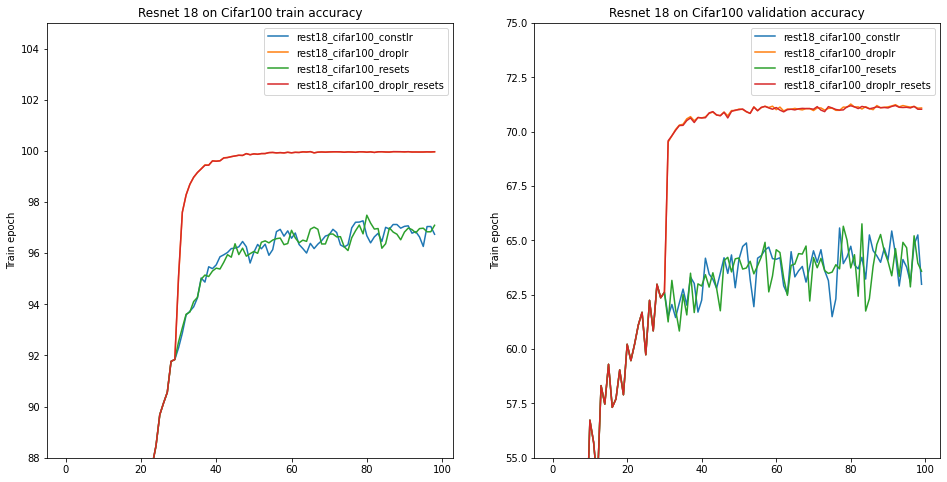

In [53]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 8 * nrows))
experiment = "momentum_resets"
expids = [
    "rest18_cifar100_constlr",
    "rest18_cifar100_droplr",
    "rest18_cifar100_resets",
    "rest18_cifar100_droplr_resets",
]
for expid in expids:
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
    axes[0].plot(d["train_accuracy1"], label=expid)
    axes[0].legend()
    axes[0].set_ylim([88, 105])
    axes[0].set_title("Resnet 18 on Cifar100 train accuracy")
    axes[0].set_ylabel("Train accuracy")
    axes[0].set_ylabel("Train epoch")
    
    axes[1].plot(d["test_accuracy1"], label=expid)
    axes[1].legend()
    axes[1].set_ylim([55, 75])
    axes[1].set_title("Resnet 18 on Cifar100 validation accuracy")
    axes[1].set_ylabel("Validation accuracy")
    axes[1].set_ylabel("Train epoch")





# Momentum resets 2
python train.py --experiment momentum_resets --expid rest18_cifar10_constlr --save-dir gs://jv_neural_mechanics --dataset cifar10 --data-dir /home/jvrsgsty/data --model resnet18 --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 256 --epochs 200 --save-freq 10000000 --train-batch-size 32 --lr 0.1 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-01 --overwrite -v

python train.py --experiment momentum_resets --expid rest18_cifar10_droplr --save-dir gs://jv_neural_mechanics --dataset cifar10 --data-dir /home/jvrsgsty/data --model resnet18 --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 256 --epochs 200 --save-freq 10000000 --train-batch-size 32 --lr 0.1 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-02 --overwrite -v --lr-drops 80 120

python train.py --experiment momentum_resets --expid rest18_cifar10_resets --save-dir gs://jv_neural_mechanics --dataset cifar10 --data-dir /home/jvrsgsty/data --model resnet18 --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 256 --epochs 200 --save-freq 10000000 --train-batch-size 32 --lr 0.1 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-03 --overwrite -v

python train.py --experiment momentum_resets --expid rest18_cifar10_droplr_resets --save-dir gs://jv_neural_mechanics --dataset cifar10 --data-dir /home/jvrsgsty/data --model resnet18 --model-class tinyimagenet --loss ce --optimizer custom_sgd --test-batch-size 256 --epochs 200 --save-freq 10000000 --train-batch-size 32 --lr 0.1 --wd 0.0001 --momentum 0.9 --tpu jv-pt-tpu-04 --overwrite -v  --lr-drops 80 120



CUDA_VISIBLE_DEVICES=1 python cache.py --metrics performance_from_ckpt --experiment momentum_resets --expid rest18_cifar10_constlr --save-dir /mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics --overwrite

CUDA_VISIBLE_DEVICES=1 python cache.py --metrics performance_from_ckpt --experiment momentum_resets --expid rest18_cifar10_droplr --save-dir /mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics --overwrite

CUDA_VISIBLE_DEVICES=1 python cache.py --metrics performance_from_ckpt --experiment momentum_resets --expid rest18_cifar10_resets --save-dir /mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics --overwrite

CUDA_VISIBLE_DEVICES=1 python cache.py --metrics performance_from_ckpt --experiment momentum_resets --expid rest18_cifar10_droplr_resets --save-dir /mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics --overwrite



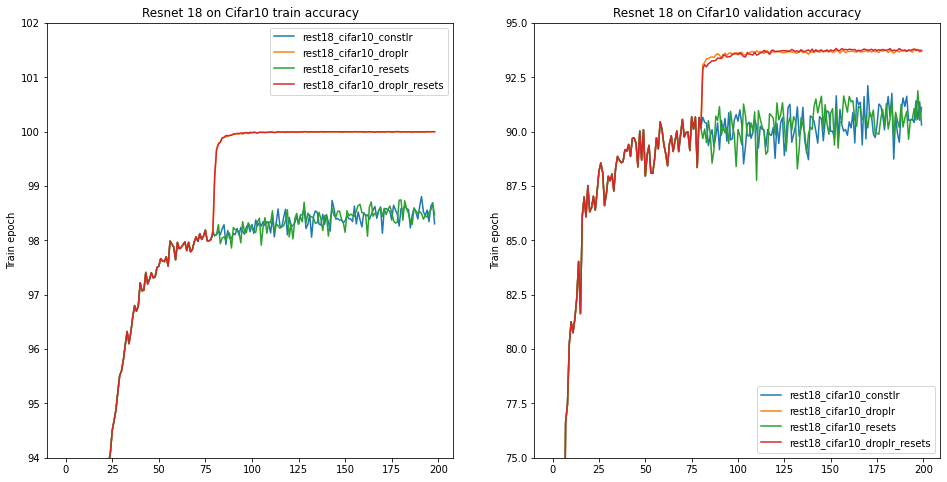

In [57]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 8 * nrows))
CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "momentum_resets"
expids = [
    "rest18_cifar10_constlr",
    "rest18_cifar10_droplr",
    "rest18_cifar10_resets",
    "rest18_cifar10_droplr_resets",
]
for expid in expids:
    d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
    axes[0].plot(d["train_accuracy1"], label=expid)
    axes[0].legend()
    axes[0].set_ylim([94, 102])
    axes[0].set_title("Resnet 18 on Cifar10 train accuracy")
    axes[0].set_ylabel("Train accuracy")
    axes[0].set_ylabel("Train epoch")
    
    axes[1].plot(d["test_accuracy1"], label=expid)
    axes[1].legend()
    axes[1].set_ylim([75, 95])
    axes[1].set_title("Resnet 18 on Cifar10 validation accuracy")
    axes[1].set_ylabel("Validation accuracy")
    axes[1].set_ylabel("Train epoch")



# Negative momentum

In [ ]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(8 * ncols, 6 * nrows), sharey=True)

CACHE_PATH = "/mnt/fs6/jvrsgsty/neural-mechanics/jv_neural_mechanics"
experiment = "pretrained_imagenet"
expid = "rest18_momn1"
d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
i = 0
x = range(101, 101+len(d["train_accuracy1"]))
axes[0].plot(x, d["train_accuracy1"], label="train", color=plt.cm.tab10(i))
xx = range(100, 100+len(d["test_accuracy1"]))
axes[0].plot(xx, d["test_accuracy1"], label="test", color=plt.cm.tab10(i), ls="--")
axes[0].plot(xx, [100]*len(d["test_accuracy1"]), color="k", ls="--")
axes[0].legend()
axes[0].set_title("Imagenet accuracy. Resnet18, Momentum = -1")
axes[0].set_ylabel("Accuracy")
axes[0].set_xlabel("Train epoch")

expid = "rest18_momn9"
d = dd.io.load(f"{CACHE_PATH}/{experiment}/{expid}/cache/performance_from_ckpt.h5", "/performance")
x = range(101, 101+len(d["train_accuracy1"]))
axes[1].plot(x, d["train_accuracy1"], label="train", color=plt.cm.tab10(i))
xx = range(100, 100+len(d["test_accuracy1"]))
axes[1].plot(xx, d["test_accuracy1"], label="test", color=plt.cm.tab10(i), ls="--")
axes[1].plot(xx, [100]*len(d["test_accuracy1"]), color="k", ls="--")
axes[1].legend()
axes[1].set_title("Imagenet accuracy. Resnet18, Momentum = -0.9")
axes[1].set_ylabel("Accuracy")
axes[1].set_xlabel("Train epoch")